In [1]:
from eval.trainVAE import VAEEval
v = VAEEval()

In [2]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN,Birch
from sklearn.metrics import calinski_harabasz_score

In [3]:
fe = v.feature_extractor
data = v.data_set.ext_df.tolist()
_pred = v.data_set.tag_ids.tolist()
ori = v.data_set.ori_df

In [12]:
v.data_set.ori_df.iloc[0,2]

'blockchain originally block chain grow list record call block link use cryptography block contains cryptographic hash previous block timestamp transaction data generally represent merkle tree cryptocurrency crypto currency digital asset design work medium exchange wherein individual coin ownership record store ledger exist form computerized database use strong cryptography secure transaction record control creation additional coin verify transfer coin ownership typically exist physical form like paper money typically issue central authority cryptocurrencies typically use decentralize control oppose centralize digital currency central banking system cryptocurrency mint create prior issuance issue single issuer generally consider centralize implemented decentralize control cryptocurrency work distribute ledger technology typically blockchain serf public financial transaction database numismatics portal economics social science study production distribution consumption good service finan

In [4]:
v.data_set.goal_ids[1]

tensor([22, 22, 12, 51,  8, 16,  9, 32,  2, 20])

In [ ]:
v.query_ext([v.data_set.pos[1][0]])

In [ ]:
v.data_set.ext_df.iloc[0]

In [6]:
v.data_set.raw_ids.iloc[0]

tensor([22, 22, 22,  1,  8, 14, 26,  8, 14, 26, 12, 51, 13, 49, 50,  8, 16,  9,
        32, 45,  6,  2, 20, 45, 30, 41, 23, 40, 37, 18, 19,  2, 22, 22, 12, 51,
         8, 16,  9, 32,  2, 20])

In [4]:
v.train()

epoch:0,loss:50296755.0
tensor(496.2422, device='cuda:0', grad_fn=<SumBackward0>)
epoch:1,loss:50296668.125
epoch:2,loss:50296659.625
epoch:3,loss:50296656.5
epoch:4,loss:50296654.5
epoch:5,loss:50296653.5
epoch:6,loss:50296653.5
epoch:7,loss:50296653.5
epoch:8,loss:50296653.5
epoch:9,loss:50296653.5
epoch:10,loss:50296653.5
tensor(500.6136, device='cuda:0', grad_fn=<SumBackward0>)
epoch:11,loss:50296653.5
epoch:12,loss:50296653.5
epoch:13,loss:50296653.5
epoch:14,loss:50296653.5
epoch:15,loss:50296653.5
epoch:16,loss:50296653.5
epoch:17,loss:50296653.5
epoch:18,loss:50296653.5
epoch:19,loss:50296653.5
epoch:20,loss:50296653.5
tensor(499.9301, device='cuda:0', grad_fn=<SumBackward0>)
epoch:21,loss:50296653.5
epoch:22,loss:50296653.5
epoch:23,loss:50296653.5
epoch:24,loss:50296653.5
epoch:25,loss:50296653.5
epoch:26,loss:50296653.5
epoch:27,loss:50296653.5
epoch:28,loss:50296653.5
epoch:29,loss:50296653.5


In [5]:
# fe = t.vae
# _,theta,*_ = fe(data,pred=_pred)
_,theta,*_ = fe(data)

In [6]:
def do_tsne(X):
    tsne = TSNE(n_components=2)
    new_x = tsne.fit_transform(X)
    return new_x,tsne

In [7]:
t,tsne = do_tsne(theta.cpu().detach())

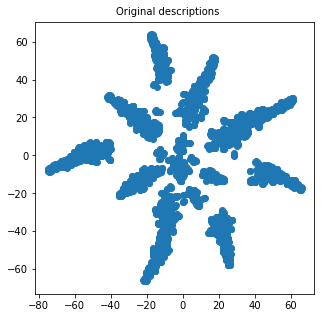

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure('enriched',(5,5))
fig.text(0.35,0.9,'Original descriptions')
ax = fig.add_subplot(111)
ax.scatter(t[:,0],t[:,1])
fig.show()

In [10]:
from sklearn.cluster import KMeans,DBSCAN
km = KMeans()
db = DBSCAN()

In [ ]:
r1 = km.fit_predict(t)
r2 = db.fit_predict(theta.cpu().detach())

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure('enriched',(5,5))
fig.text(0.35,0.9,'Original descriptions')
ax = fig.add_subplot(111)
ax.scatter(t[:,0],t[:,1],c=r1)

fig.show()

In [ ]:
ori[r1==1]

In [ ]:
from eval.TagLSTMEval_topic import LSTMEval
model = LSTMEval()

In [ ]:
model.train()

In [ ]:
torch.autograd.set_grad_enabled(False)

for id1,id2,l in model.train_data_loader:
    break
in1 = model.get_BoWs(id1)    
in2 = model.ext_df[id2]
text2 = model.data_set[id2]

In [ ]:
positives = torch.sort(l,descending=True)[1]

In [ ]:
import torch
f1,w1 = model.feature_extractor([torch.LongTensor(s) for s in id1],in1,model.vae)

In [ ]:
k = positives[2].item()
w1[k]

In [ ]:
[model.di.id2token[_i] for _i in id1[k]]

In [ ]:
f2,w2 = model.feature_extractor(text2,in2,model.vae)

In [ ]:
[model.di.id2token[_i] for _i in text2.iloc[k].numpy().tolist()]

In [ ]:
word_mask = (w2[k]>0.5).squeeze()[:len(text2.iloc[k])]

In [ ]:
[model.di.id2token[_i] for _i in text2.iloc[k][word_mask].numpy().tolist()]

In [ ]:
model.cos(f1,f2)[k]

In [ ]:
for id1 in model.test_keys:
    break
pos = list(model.data_set.pos[id1][1])
text_bow = model.get_BoWs([model.data_set.pos[id1][0]])
text = [torch.LongTensor(model.data_set.pos[id1][0])]

In [ ]:
[model.di.id2token[_i] for _i in text[0].numpy()]

In [ ]:
all_f = []
for _ids in model.ids_loader:
    _t = model.data_set[_ids.cpu().numpy()]
#   _b = self.bow[_ids.cpu().numpy()]
    _b = model.ext_df[_ids.cpu().numpy()]
    _f,*_ = model.feature_extractor(_t,_b,model.vae)

    all_f.append(_f.cpu())
all_f = torch.cat(all_f,dim = 0).view(len(model.data_set),-1)

In [ ]:
torch.cuda.empty_cache()